<a href="https://colab.research.google.com/github/KeerHu73/knn/blob/main/lab/computer_vision_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [16]:
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Get MNIST data:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True,
                                           transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True,
                                          transform=transforms.ToTensor())

# Create data loaders for batch training:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True) # Randomize training data order
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Build the nn model as a class/object:
class Net(nn.Module): # Class Net inherits from the nn.Module class

    def __init__(self): # Specify architecture
        super(Net, self).__init__()
        self.layer1 = nn.Linear(28*28, 128) # Input* 28*28 -> 128 hidden nodes
        self.layer2 = nn.Linear(128, 64) # 128 hidden nodes -> 64 hidden nodes
        self.output = nn.Linear(64, 10) # Output: hidden nodes 64 -> 10 labels

    def forward(self, x): # Specify activation
        x = x.view(-1, 28*28) # Input layer
        x = F.relu(self.layer1(x)) # Relu layer 1
        x = F.relu(self.layer2(x)) # Relu layer 2
        x = self.output(x) # Output layer
        return x

model = Net() # Initialize untrained model

# Select loss function and optimizer:
criterion = nn.CrossEntropyLoss() # Loss function: Categorical cross entropy
optimizer = optim.Adam(model.parameters()) # Optimizer: Adam
L = 15 # training length (another hyperparameter)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 14.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 443kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.46MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.25MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [17]:
# Train model:
for epoch in range(L): # Control length of training
    for i, data in enumerate(train_loader):
        inputs, labels = data # Get this data chunk
        optimizer.zero_grad() # Set gradients to zero
        outputs = model(inputs) # Use current model to make predictions
        loss = criterion(outputs, labels) # Evaluate current loss
        loss.backward() # Back-propagation for next iteration
        optimizer.step() # Find a lower loss set of weights

In [18]:
y_hat = [] # Predicted values
y_act = [] # Actual values

with torch.no_grad(): # Do not update gradient
    for data in test_loader: # Iterate over data batches
        inputs, labels = data # (y,X)
        outputs = model(inputs) # evaluate model for these data
        max_values, predicted_values = torch.max(outputs.data, 1) # extract predictions
        y_act+=labels.tolist() # Add actual values
        y_hat+=predicted_values.tolist() # Add predicted values

print( pd.crosstab(y_hat, y_act) ) # Confusion matrix

acc = np.sum( [y_hat[i] == y_act[i] for i in range(len(y_hat))] ) / len(y_hat)
print('Accuracy: %d %%' % (100 * acc)) # Accuracy

col_0    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      971     0    5    1    1    3    3    1    5    2
1        0  1117    1    0    0    0    2    3    0    2
2        1     4  995    5    4    0    1    8    3    0
3        0     0    2  973    0    7    1    0    3    1
4        1     0    2    0  960    2    6    5    3   10
5        0     0    0    9    0  862   12    0    3    0
6        2     2    3    0    2    3  931    0    0    0
7        0     0    5    3    2    1    0  994    3    1
8        3    12   17    4    2    6    2    7  949    4
9        2     0    2   15   11    8    0   10    5  989
Accuracy: 97 %


1.

In [19]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

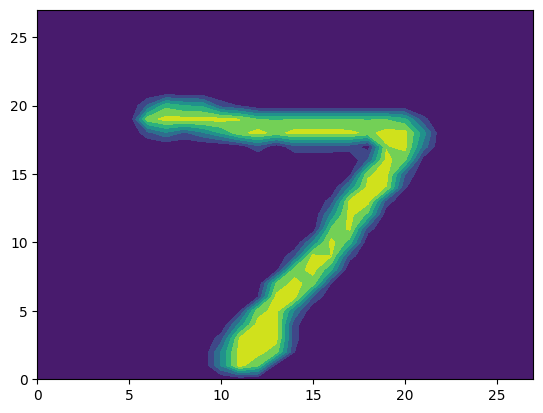

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

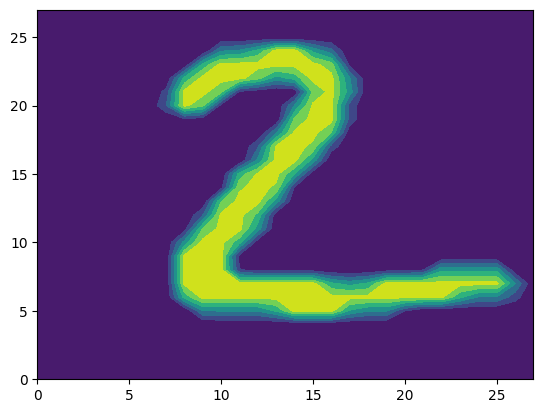

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

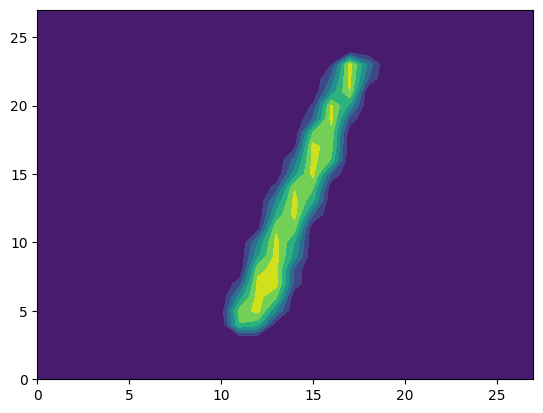

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

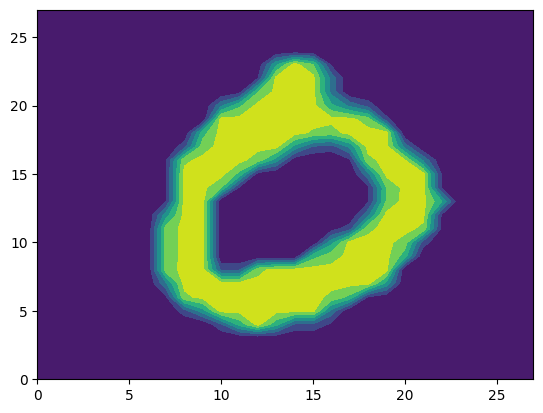

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

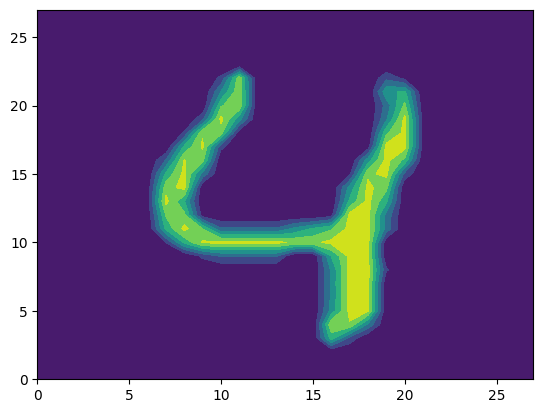

In [20]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

2. What is the shape of X_train and X_test? What is the shape of X_train[i] and X_test[i] for each index i? What is the shape of y_train and y_test?

In [21]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)
print(X_test[0].shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)
(28, 28)
(60000,)
(10000,)





> *   28x28 matrices: 60k in training (X_train), 10k in test (X_test).
*   Labels: 60k (y_train) and 10k (y_test). Each matrix maps 1:1 to its label.





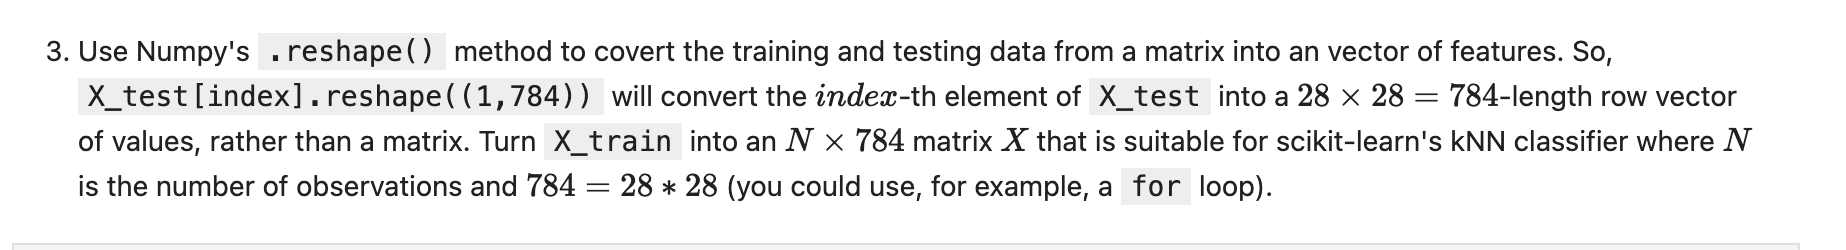

In [22]:
import pandas as pd
import numpy as np

# Control data loading method:
# 1 = process and save new data, 0 = load from existing CSV
reload = 1  # Change to 0 if files already exist

# Define file paths
train_path = '/content/Z_train.parquet'
test_path = '/content/Z_test.parquet'

if reload == 1:  # Process and save reshaped data
    print("Reshaping and saving data...")

    # Process training data
    Z_train = []
    for i in range(60000):  # MNIST training set size
        row = X_train[i].reshape(1, 784)[0]  # Flatten 28x28 matrix to 1D vector
        Z_train.append(row)
    Z_train = pd.DataFrame(Z_train)

    # Process test data
    Z_test = []
    for i in range(len(y_test)):  # Ensure test set size matches y_test length
        row = X_test[i].reshape(1, 784)[0]
        Z_test.append(row)
    Z_test = pd.DataFrame(Z_test)

    # Save data with utf-8-sig encoding to avoid encoding issues
    Z_train.to_csv(train_path, encoding='utf-8-sig', index=False)
    Z_test.to_csv(test_path, encoding='utf-8-sig', index=False)

else:  # Load saved CSV files
    print("Loading saved data...")

    # Read CSV files, avoiding UnicodeDecodeError
    Z_train = pd.read_csv(train_path, encoding='utf-8-sig', errors='replace')
    Z_test = pd.read_csv(test_path, encoding='utf-8-sig', errors='replace')

    # Print data dimensions to confirm successful loading
    print("Z_train shape:", Z_train.shape, "Z_test shape:", Z_test.shape)


Reshaping and saving data...


4. Use the reshaped X_test and y_test data to create a k-nearest neighbor classifier of digit. What is the optimal number of neighbors k? If you can't determine this, play around with different values of k for your classifier.

Current k:  1
Current k:  2
Current k:  3
Current k:  4
Current k:  5
Current k:  6
Current k:  7
Current k:  8
Current k:  9
Current k:  10
Current k:  11
Current k:  12
Current k:  13
Current k:  14
Current k:  15
Current k:  16
Current k:  17
Current k:  18
Current k:  19
Current k:  20
[3]


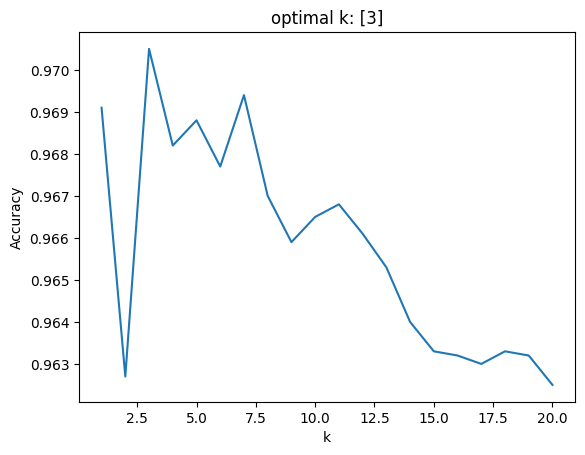

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Determine the optimal k:
k_bar = 20
accuracy = []

for k in range(k_bar):
    print('Current k: ' , str(k+1))
    knn = KNeighborsClassifier(n_neighbors=k+1) # Create classifier instance
    predictor = knn.fit(Z_train.values,y_train) # Fit model
    accuracy.append( predictor.score(Z_test.values,y_test) ) # Store accuracy; bug in sklearn requires .values

accuracy_max = np.max(accuracy) # highest recorded accuracy
max_index = np.where(accuracy==accuracy_max)[0]
k_star = max_index+1 # Find the optimal value of k
print(k_star)

plt.plot(np.arange(1,k_bar+1),accuracy) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k: "+str(k_star))
plt.ylabel('Accuracy')
plt.show()

5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.

In [26]:
# Initialize kNN classifier with k=1 (1-nearest neighbor)
knn = KNeighborsClassifier(n_neighbors=1)

# Train the model using the reshaped training data (Z_train) and training labels (y_train)
predictor = knn.fit(Z_train.values, y_train)

# Predict labels for the test set (Z_test)
y_hat = predictor.predict(Z_test.values)

# Compute accuracy of the model on the test set
accuracy = knn.score(Z_test.values, y_test)
print('Accuracy:', accuracy)

# Generate confusion matrix to analyze classification errors
conf_matrix = pd.crosstab(y_test, y_hat)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9691
Confusion Matrix:
 col_0    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      973     1    1    0    0    1    3    1    0    0
1        0  1129    3    0    1    1    1    0    0    0
2        7     6  992    5    1    0    2   16    3    0
3        0     1    2  970    1   19    0    7    7    3
4        0     7    0    0  944    0    3    5    1   22
5        1     1    0   12    2  860    5    1    6    4
6        4     2    0    0    3    5  944    0    0    0
7        0    14    6    2    4    0    0  992    0   10
8        6     1    3   14    5   13    3    4  920    5
9        2     5    1    6   10    5    1   11    1  967


6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?



> The biggest mistakes in the confusion matrix are mistaking 7 for 1 (14 times), 9 for 4 (22 times), 8 for 3 (14 times), 8 for 5 (13 times), and 7 for 9 (10 times). These errors follow a clear pattern: the misclassified digits share strong visual similarities, making them difficult to distinguish based on pixel values alone. This makes sense because even humans misread these digits, especially when handwriting is unclear or stylized. Since kNN relies purely on pixel-based distance, it struggles with digits that have overlapping shapes, such as curved numbers (8 vs. 3, 8 vs. 5) and digits with similar strokes (4 vs. 9, 7 vs. 1).







7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)



> Each image in the dataset is currently a 28×28 grid of grayscale pixel intensities. To add color, we can represent each pixel with three values instead of one, corresponding to the Red, Green, and Blue (RGB) color channels. This means we would have three separate 28×28 matrices, one for each color. To convert this into a tabular format for machine learning, we flatten each matrix into a 784-length vector and stack them together, creating a single 2352-feature row (28×28×3). This allows models to handle color images just like grayscale ones, with each pixel now carrying more detailed color information.

